# Adaboosting, Gradient Boosting, XGBoost Classifier

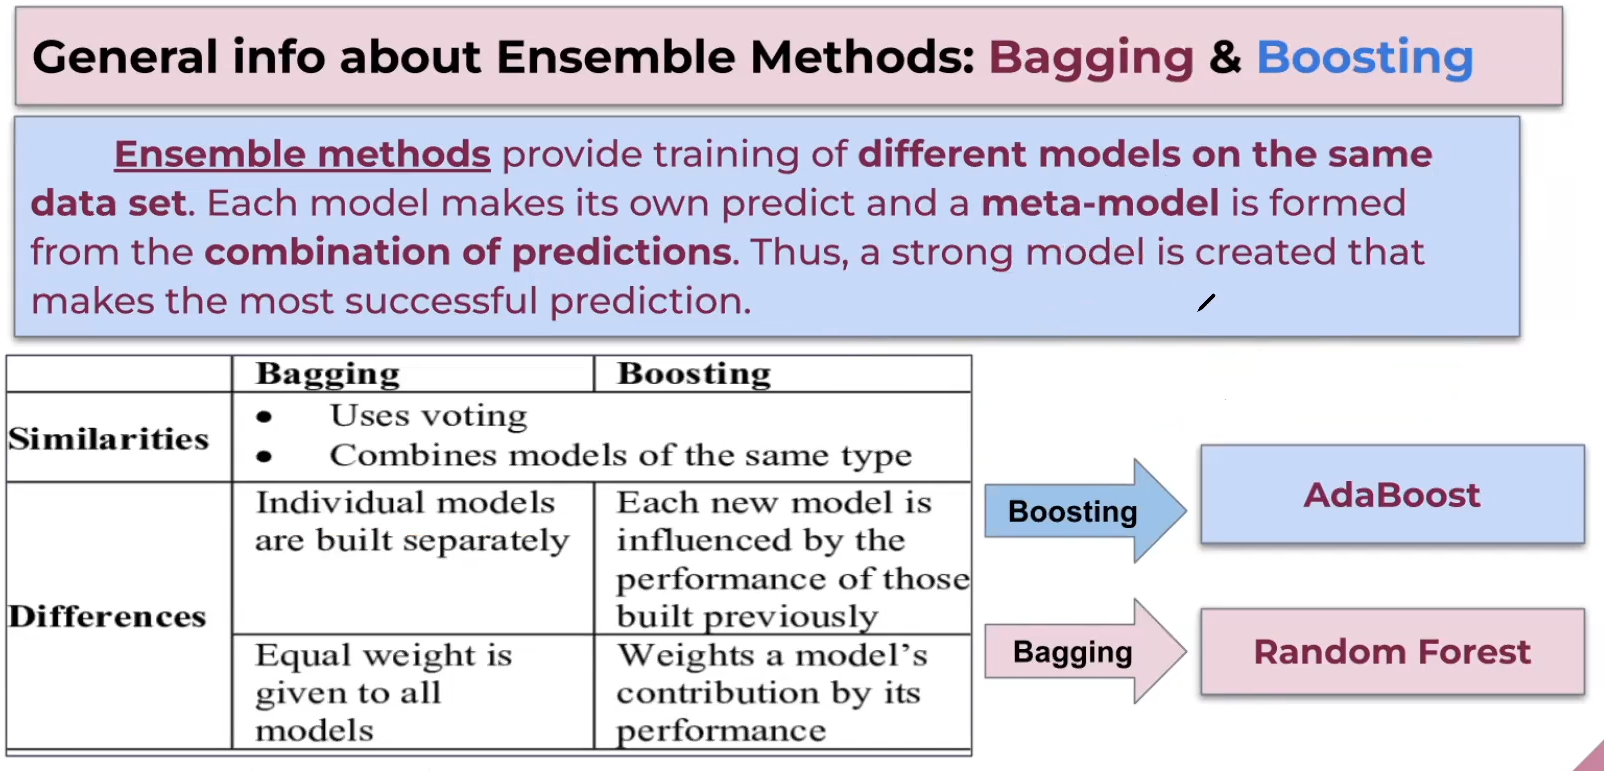

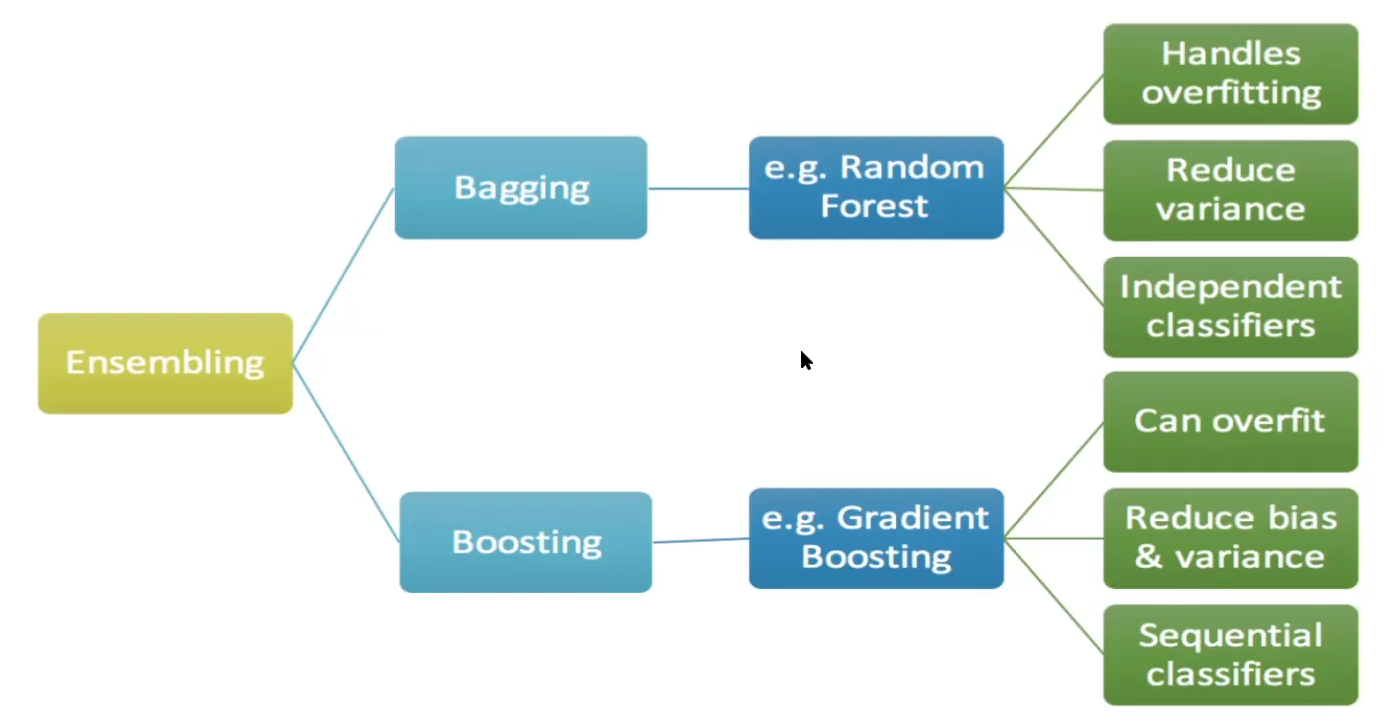

Bagging --> independent

Boosting --> dependent

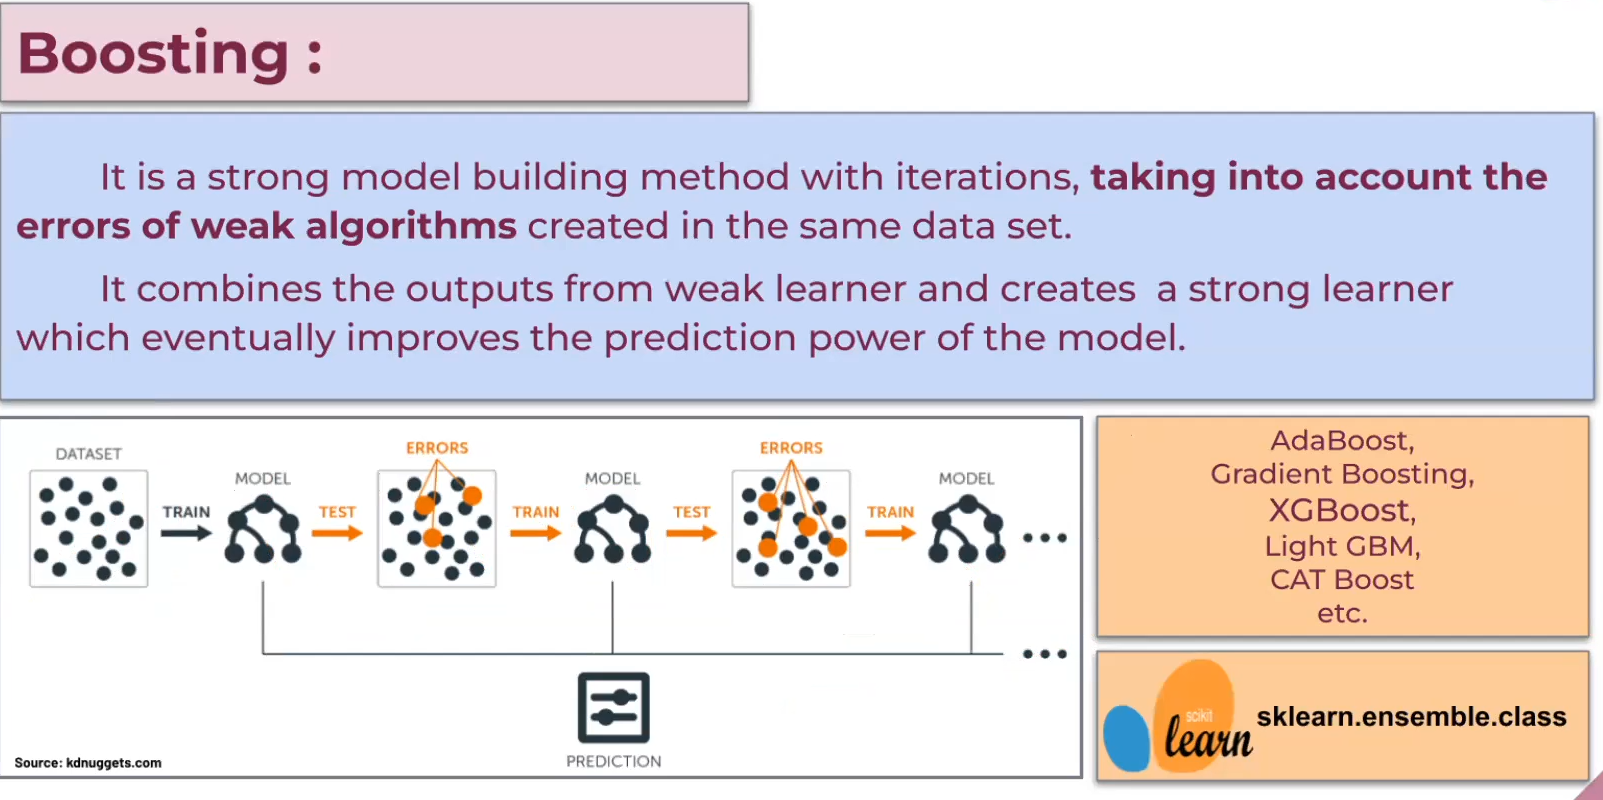

We will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes

* 'Age': cutomer age in years

* 'Area Income': Avg. Income of geographical area of consumer

* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet

* 'Ad Topic Line': Headline of the advertisement

* 'City': City of consumer

* 'Male': Whether or not consumer was male

* 'Country': Country of consumer

* 'Timestamp': Time at which consumer clicked on Ad or closed window

* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('advertising2.csv')
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()   # Mean std degerlerinde sikinti yok. 

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

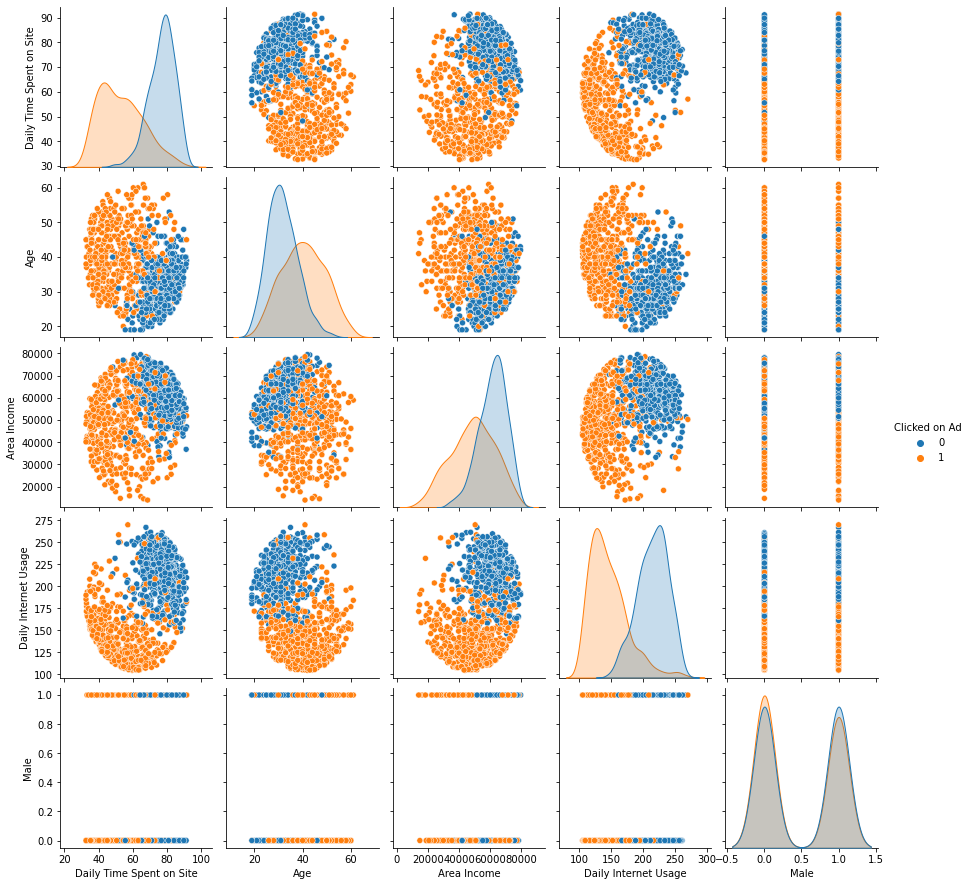

In [9]:
sns.pairplot(df, hue='Clicked on Ad')

## Train | Test Split

In [5]:
from sklearn.model_selection import train_test_split

Asagida X icin sadece gerekli olan feature'lari aldik. Sadece bu featrure' lari kullanarak tahminler gayet iyi cikti.

In [11]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ADABOOST CLASSIFIER

## Modelling and Model Performance

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [14]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Random Forest modelde her agac birbirinden bagimsizdir, her agacin verdigi oy esittir.En son oylar sayilir ve oylar en fazla hangi class' a ait cikarsa tahmin o class' a atilir.

Burda agaclar birbirini etkiler. Birinden cikan bilgi diger agaca aktarilir.

__PARAMETERS__

BASE_ASTIMATOR -----> (Default= None) 'None' ise DecisionTreeClassifier kullanir ve max_depth=1 olarak kabul eder.(Derinlik, yani asagi dogru bir kere dallansin.) 

Yani tek bir koku 2 tane de yapragi olur. Bu yuzden weak learner' dir. max_depth ne kadar fazla olursa o kadar dallanirdi ve tahminler iyilesirdi.

N_ESTIMATORS -----> Arka arkaya eklenecek agac sayisi (default=50)

LEARNING_RATE -----> Bir sonraki agaca gozlemleri aktarirken ne kadar agirliklandirma yapilacagina karar verir. (Default=1). Default'un 1 olmasi demek gozlem sayisini bir sonraki agacta cok artir, bu yanlis tahmini bir an once bil demek. Bu durumun modeli overfitting' e goturme tehlikesi var. Mesela 0.5 oldugu zaman cok daha az artirir yani daha az agirliklandirma yapar.

learning_rate duserse agac sayisi artar. Bu yuzden agac sayisi ile learning_rate arasinda bir oranti olmali. Istenen durum; learning_rate dusuk olsun, agac sayisi yuksek olsun. Default=1' deki gibi cok agresif davranmasin.

! Bu modelin baska parametresi yoktur. Ama asagida goruldugu gibi DecisionTreeRegressor import edilip olusan base_model AdaBoostClassifier' in icine verilebilir ve boylece onun icindeki parametreler ile oynanabilir. fakat bu agac ne kadar kuvvetlendirilirse "weak learner" mantigindan cikacaktir ve modeli daha kolay overfitting' e goturecektir. Mesela max_depth=2 yapilabilir ama daha fazla artirmak boosting' in mantigina ters duser. Ihtiyac duyuldugunda en fazla 2 yapilabilir ama buna da gerek yok cunku bu modelin daha ust versiyonu olan Gradient Boosting ve XGBoost ile bu islemi yaparlar. 

In [15]:
#base_estimator=DecisionTreeRegressor(max_depth=1)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [18]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

Asagida cikan skorlarin birbiri ile dengeli gibi fakat Train ile Tes set arasinda biraz fark var. Overfitting baslangici var diyebiliriz. Bunun icin asagida parametrelerle oynayabiliriz.

In [19]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



CrossValidate sonucu asinda skorlarin Train set sonuclarina yakin oldugunu goruyoruz. Aldigimiz tek seferlik sonuclar bizi yaniltmis :

__Cross Validate__

In [21]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.960000
test_precision    0.968795
test_recall       0.950505
test_f1           0.958988
dtype: float64

__VISUALIZATION__

In [23]:
from sklearn.tree import plot_tree

In [24]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

Bir onceki penguen datasetinde target' daki butun veriler string idi ve gorsellestirmede bir sorun yasamamistik. Fakat burda sayilardan olustugu icin asagida bunu string' e secirdik. plot_tree string veri ister. 

In [25]:
# targets = df["Clicked on Ad"].astype("str")

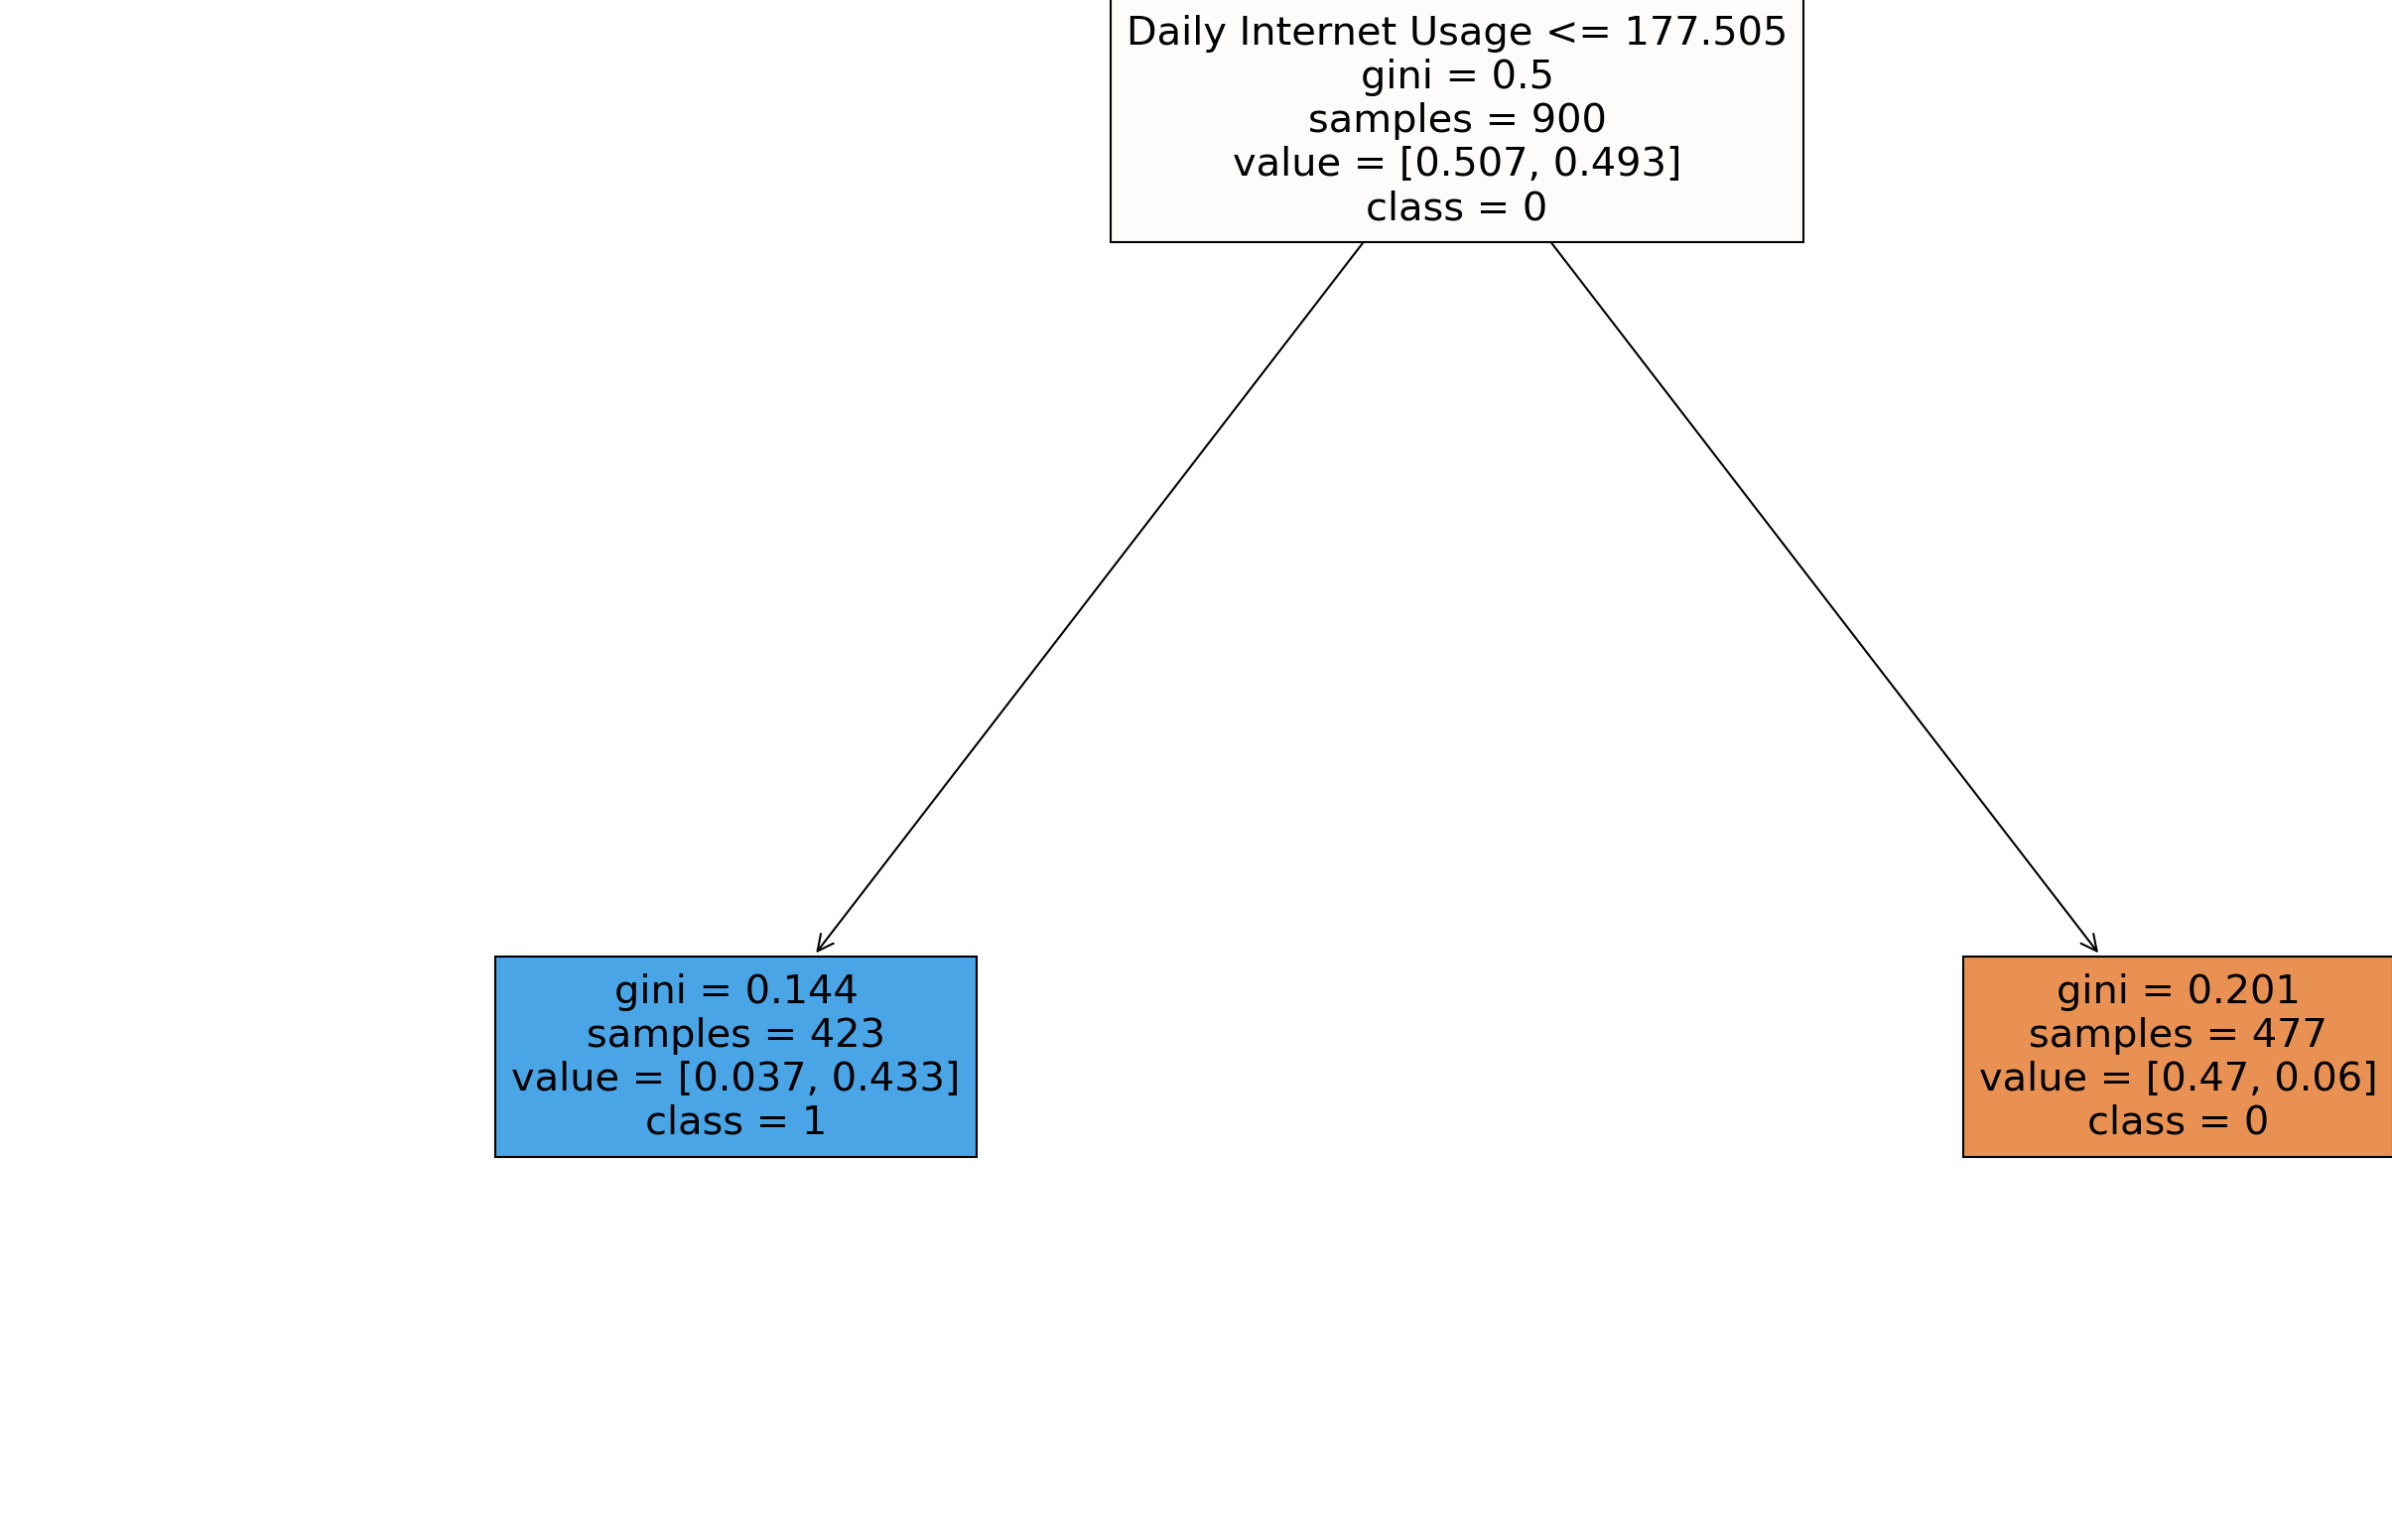

In [18]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str") # classification değerlerimiz integer değer oldukları için onları stringe çevirdik, yoksa error.
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=targets.unique());

Burada 1000 datamiz var.  Butun data bir sonraki agaca tamamen aktarilir ama hepsi ayni degildir. Ilk agacta hata yaptigi datalari agirliklandirir yani bir sonraki modelde onlari birden fazla kere alir. Bir dahaki agacta isleme giren data sayisi degismiyordu. Bunu da su sekilde ayarlar : Zaten daha once bildiklerinin bazilarini bir dahaki modele almaz, onun yerine bilemediklerini daha fazla sayida tekrar tekrar yazar. Yani duplicate yapar. Bu sekilde bir agacta yanlis tahmin ettigi veriyi bir sonraki agacta tahmin etme olasiligi artar.

Burada learning_rate'in fazla olması bizi overfitting'e götürür.

max depth 2 3 yapılabilir ama daha fazla yapmanın bir mantığı yoktur. Boosting'in mantığını alt ederiz yoksa.

Yani her agac bir onceki agactan aldigi datada tahmin edilemeyenlerin sayisini artirir. Agirliklandirma islemini bu sekilde yapar.

Skorlamayi ise soyle yapar ---> Asagida verilen ornekteki bilgilere gore target class' ina nasil karar verdigini inceleyelim :

Yukaridaki agacin kokunde __Daily Time Spent on Site < 177.505__ mi diye soruyor. Degerimiz 177' den kucuk oldugu icin sol dala gider ve oradaki class tahmini 1 imis.

Yukaridaki kodda __model.estimators_[0]__ yerine 1 yazip ikinci agaca gecelim. O da __Daily Internet Usage ,= 64__ mu diye soruyor. Cevap hayir oldugu icin sag tarafa gitti. Buradaki tahmin class' i 0 mis.

Kodda __model.estimators_[0]__ yerine 2 yazarsak ilk kokte yas cikiyor. __Age <= 42.5__ mu diye soruyor. Gozlemdeki yas 35' ti buna evet dedik sol dala gittik. Yine 

Bu 3 agactan aldigimiz degerlere gore Random Forest her agactan bir oy toplardi bir tane 1; 2 tane 0 degeri ile bu gozlem icin class secimini 0 olarak yapardi. Fakat AdaBoost agirliklandirma mantigi ile calisir. Asagidaki gibi __model.estimator_errors___ dersek bize her agacin yuzdesel olarak errorlerini dondurur. Bu deger sifira ne kadar yakinsa o kadar mukemmel tahminler yapmis demektir. 

In [28]:
1-1/2

0.5

In [20]:
model.estimator_errors_  # her ağacın errorları. Ne kadar 0'a yakınsa o kadar iyidir.

array([0.09666667, 0.15660636, 0.29526371])

Her agacin AdaBoost uzerinde agirliklandirma formulu vardir. Bunu bizim yerimize Python yapar fakat mantigini anlamak icin asagidaki islemlere bakalim. log' un icinde 1' de cikardigimiz kisim, estimator_errors_' da buldugumuz degerdir. Deger formulde yerine kondugunda ilk agacta 1 sinifina ait agirliklandirma katsayisini 1.11 vermis; diger iki agacta 0 sinifina ait agirliklandirma katsayilarini 0.84 ve 0.43 vermis. 0 sinifina ait olanlari kendi arasinda toplar; (0.84 + 0.43 = 0.127). Bu deger ilkinden buyuk oldugu icin verdigimiz gozlem icin class'i sifir olarak secer.

Yani bazen tek bir agac, agirliklandirma katsatisi fazla oldugu icin diger 4' unun onune gecebilir. 

In [21]:
1/2*np.log((1-0.09666667)/0.09666667) #1

1.117411476360216

In [22]:
1/2*np.log((1-0.15660636)/0.15660636) #0

0.8418492023096668

In [23]:
1/2*np.log((1-0.29526371)/0.29526371) #0

0.43497739343711583

## Analyzing performance as more weak learners are added.

n_estimator'a gore (agac sayisi), AdaBoostClassifier' da aldigimiz error_rate' leri asagida gorsellestirelim. Her agac icin f1 skoru 1' den cikardik bu da bize erroru verdi. Burdan sunu goruyoruz; belli bir noktaya gelip en dusuk skoru aldiktan sonraki skorlar asagi yukari birbirine yakin olacaktir. Burda en dusuk skoru 20-40 arasinda almis sonraki skorlardacok fazla bie degisim olmamis. Bu yuzden GridSearch' de n_estimators sayisina 250-500 gibi buyuk araliklar da verebiliriz. (Asagidaki sekilde degerler arasinda cok fark varmis gibi gorunuyor ama y eksenine baktigimizda aralarinda sayisal olarak cok da bir fark olmadigini gorebiliriz.)

In [29]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n) # Aralıkları büyük verebiliriz; 100, 200, 500, 700 gibi. Özellikle büyük datasetleri için.
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

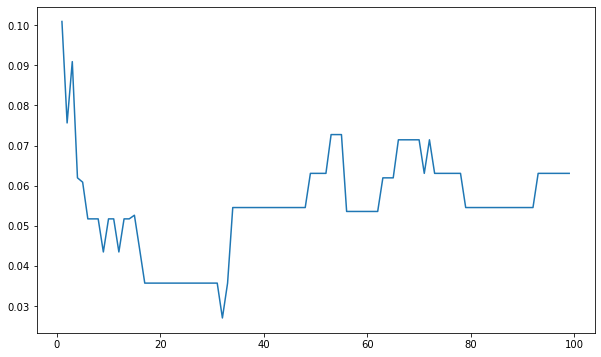

In [30]:
plt.plot(range(1,100), error_rates);

Yukaridaki grafikte 20-30 arasindaki iyi olan degeri belki yakalariz diye 20 ve 30 gibi kucuk sayilari da ekledik. 

## Gridsearch

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
model = AdaBoostClassifier(random_state=42)

In [33]:
param_grid = {"n_estimators": [20, 30, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [34]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1')

In [30]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 100, 200]},
             scoring='f1')

In [31]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

learning_rate default degeri 1 idi, n_estimators default degeri ise 50 idi. Ama modelimiz default degerlerle hard tahminler yaparak hemen sonuca ulasmak yerine bu yeni degerlerle daha soft tahmin yapacak, agac sayisi artacak. Bu da bizi overfitting' den kurtaracak. 

In [32]:
ada_grid_model.best_score_  # bu bizim f1 skorumuz. Çünkü yukarda f1 vermiştik.

0.969132103588408

Yukarida Grid Search sonrasi aldigimiz skor f1 skorudur. Cunku yukarida GridSearch modelini kurarken skor olarak f1 skorunu sectik. GridSearch' den sonra tekrar bir CrossValidate islemine gerek yok, istege bagli.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

Her model sonrasi aldigimiz f1, recall, roc_auc skorlarini karsilastirmak amaci ile asagidaki degiskenleri tanimladik :

In [33]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



GridSearch sonucu alinan skorlarda oncekine gore pek bir degisim yok. Sadece f1 skoru Test setinde %94 cikmis. Ama GridSearch' un CrossValidate' i f1 skorunu __ada_grid_model.best_score_=%96_ olarak bulmus, yani burada overfitting durumu olmadigina karar veriyoruz. 

## Feature_importances

AdaBoostClassifier' a gore tahminlemeye en fazla katkisi olan feature' i secelim. Daha sonra asagida diger modellerin feature importance' lari ile kiyaslama yapacagiz. 

In [34]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats 

ada_importance
Male                                0.00
Area Income                         0.21
Age                                 0.22
Daily Time Spent on Site            0.28
Daily Internet Usage                0.29

Bu modelde cinsiyetin target' a hicbir katkisinin olmadigini goruyoruz. 

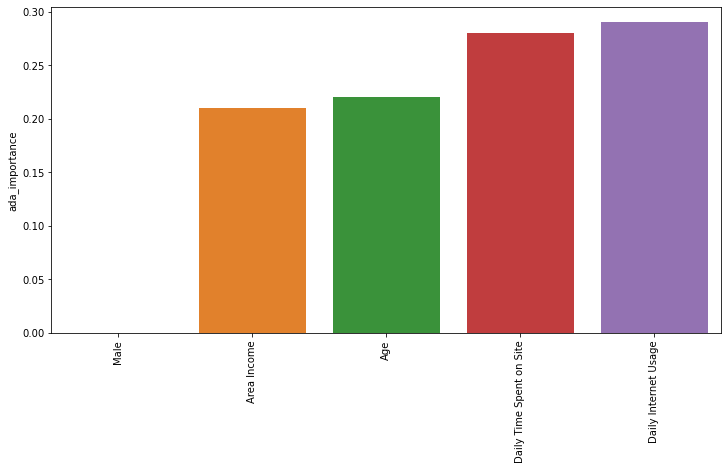

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

!! Modelin genel performansina mutlaka bakilmali !!

In [36]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

Modelin genel performansi %99, yani AdaBoost modelden guzel bir skor elde ettigimizi soyleyebiliriz.

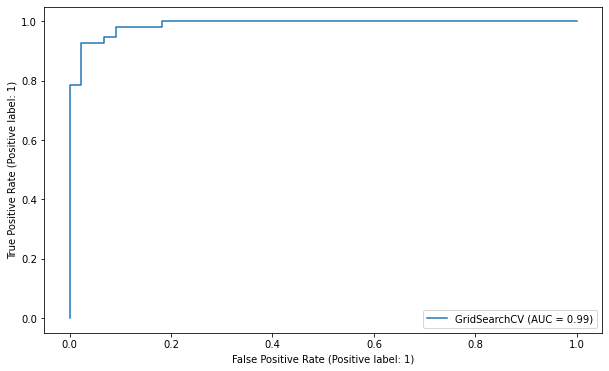

In [37]:
plot_roc_curve(ada_grid_model, X_test, y_test);

# Gradient Boosting Modelling and Model Performance

!! Linear modellerin arti yonleri ile Tree modellerin arti yonlerinin birlesimi. Feature importance'i XGBoost modele gore zayiftir. XGBoost model bunun bir ustu.!!

Gradient Boosting Model' in Gradient Boostingile calisma mantigi tamamen farklidir. Agirliklandirma uzerinden calismaz. Bir onceki modelin yaptigi hatalari iyilestirme uzerine calisir. AdaBoost' da prediction actual degere yaklastirilmaya calisiliyordu; Gradient Boosting ise residual' lari (y-ypred) 0' a yaklastirarak gercek deger ile tahmin degeri arasindaki farki kapatmayi amaclar. 

Gradient Boosting ile AdaBoost' un yaptigi sey aynidir fakat calisma mantiklari farklidir. Gradient Boosting residual (hatalar) uzerinden calisarak her yeni agacta onlari 0' a yaklastirmaya calisir. 

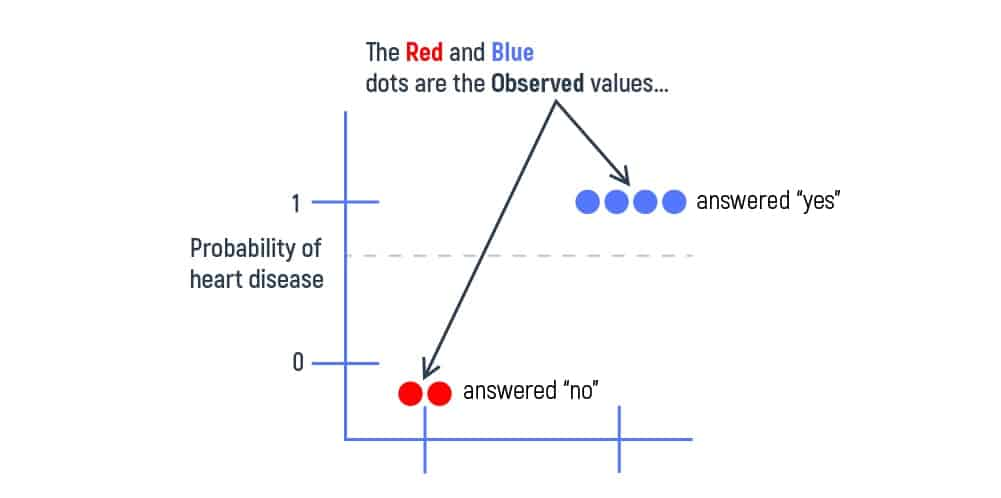

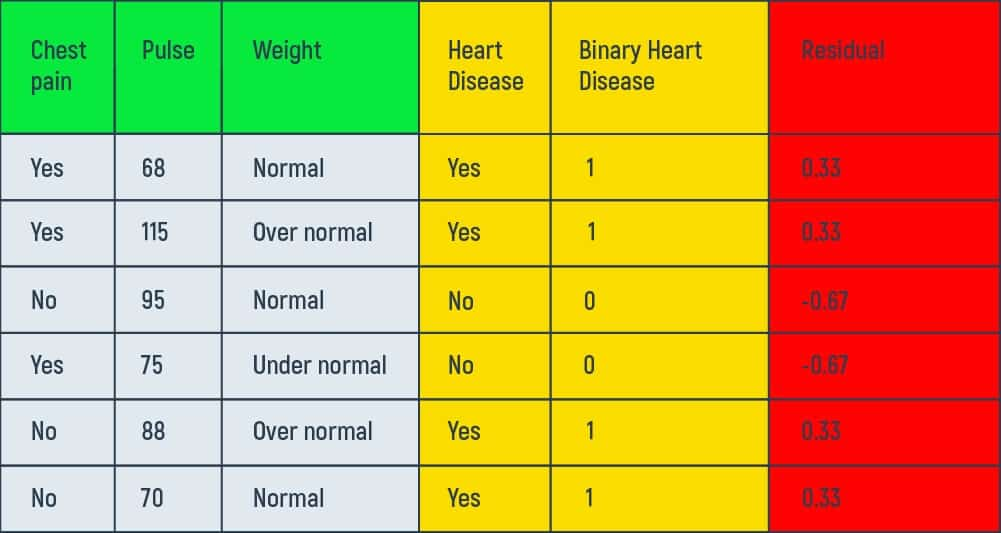

Yukaridaki data orneginde featur' lara gore Heart Disease belirlenmeye calisiliyor. Gradient Boosting her gozlem icin baslangic olasiligi belirler. Yukaridaki target labelda 4 tane 1 degeri var. Buna gore logaritmik bir hesaplama ile 1 sinifinin 0 sinifina oranini hesaplayarak ornegin 0.69 gibi bir deger bulur. Bu cikan degeri, __Logistic Regression__' in olasilik formulune sokar ve bu degeri bir olasiliga donusturur. Mesela bu deger 0.67 gibi bir olasiloga donusur. Bu bizim baslangic olasiligimiz olur. Bundan sonra modele predict ettirecegimiz butun gozlemler icin baslangic olasiligi 0.67 olur. Bunun anlami; bir predicti egitim icin ilk agaca verdigimizde 0.67 olasilikla 1 class' ina ait olacak. (Treshold=0.5 idi).b Yani butun gozlemler yoluna 1 ile baslayacak. 

Ilk agac icin residual hesaplamasini su sekilde yapar :

1 classi icin residual farki --->> 1 - 0.67 = 0.33

0 classi icin residual farki --->> 0 - 0.67 = -0.67

Yukaridaki degerler ilk agac icin residual degerleridir. Yukaridaki data orneginde son sutuna bakarsak; 1 sinifindaki her gozlem icin 0.33, 0 sinifindaki her gozlem icin ise -0.67 residual degerleri yazilmis.

Yukaridaki gozlemler uzerinden residual' lari bir sonraki agacta tekrar tahmin etmeye calisir yani residual'lari minimize etmeye calisir. Asagida bir sonraki agacta residual degerlerinin dustugunu goruyoruz. Residula' lar bu sekilde her yeni agacta biraz daha 0 degerine yaklasir. 

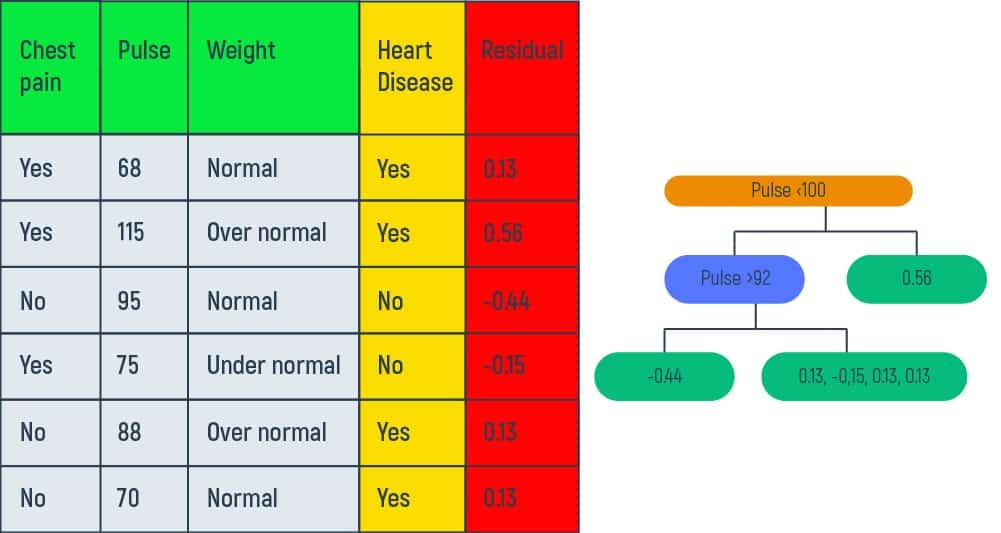

In [38]:
np.log(4/2)  

0.6931471805599453

Baslangictaki olasilik (1 classinin 0 classina orani). Her hasta 0.67 olasilikla kalp hastasi olarak yola basliyor :

In [39]:
(np.e**np.log(4/2))/(1+np.e**np.log(4/2))   # Logistic Regression' in olasilik formulu (Her gozlem icin baslangic olasiligi)

0.6666666666666666

In [40]:
0.67 + (0.1* 0.33) + (0.1* 0.13)    # 1 sinifi icin hesaplama (Buradaki 0.1 learning_rate default degeri)

0.7160000000000001

Belirlenen learning_rate ile o agactaki residual farklarini carparak her agactan gelen degeri toplar. Yukarida bu islemi 3 agac icin yapmis ve %71.6 degerini bulmus. Yani 0.5' den buyuk bir deger bukdugu icin bu gozlemi 1 classina atip kalp hastasi diyecektir. 

In [41]:
0.67 + (0.1* -0.67) + (0.1* -0.44)  

# 0 sinifi icin hesaplama. - deger aldigi icin amaci 0' a yaklastirmak. 0.5' in altina dusememis. Agac sayisi yetersiz kalmis.
# Bu yuzden hata yapti, gozlem 1 sinifina gitti.

0.5589999999999999

Yukaridaki orneklerde goruldugu gibi Gradient Boosting, her classa ait olanlarin baslangic olasiliklarini belirleyerek (buradaki ornetkte 0.69) arka planda Logistic Regression' in olasiliklarini kullanarak 1 class' indakileri 1' e, 0 class' indakileri 0' a yaklastirmaya calisir. Bu sekilde residuallari minimize etmeye calisarak gercek ile tahmin arasindaki farki kapatir ve her agacta dogru tahmine dogru adim adim gider. Belli bir agac sayisindan sonra da residullar sabitlenir ve model minimum global hatayi bulmus demek olur; artik egitime ihityac yoktur. 

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
grad_model = GradientBoostingClassifier(random_state=42)

__PARAMETERS__

LOSS -----> (Default='deviance'). Bu parametrenin aciklama kismina bakarsak __deviance=Logistic regression__ yaziyor. Yani oranlari olasiliga donustururken arka planda Logistic Regression kullanir. Yani Gradient Descent bir model ile Tree based modelleri birlestirir. Fakat burda Logistic Regression icindeki Ridge Lasso gibi parametreleri oynayamayiz. XGBoost modelde bunlari da oynayabilecegiz.

N_ESTIMATOR -----> (Default=100). Arka arkaya eklenecek agac adedi.

LEARNING_RATE -----> (Default=0.1) Her agacin ne kadar katkida bulunacagini gosterir. Bu deger buyudugu zaman agac sayisi azalir.

SUBSAMPLE ------> (Default=1) Yani ilk agaca butun datayi ver. Kaynaklarda GridSearch' de 0.5 ile 0.8' in de denenmesi tavsiye edilir. 

CRITERION -----> (Default='friedman_mse'). Agaclari bolme kriteri. mse' den bir farki yoktur. Bu bir regression parametresidir fakat Friedman tarafindan class' lar icin optimize edilmistir. Classification' da kullanilan Gini yerine bunu kullanir cunku arka planda Gradient Descent tabanli calisiyor. 

MIN_SAMPLE_SPLIT -----> (Default=2). Bolunme icin yaprakta bulunmasi gereken sample sayisi

MIN_SAMPLES_LEAF ------. (Default=1). Bir yapragin yaprak olarak kabul edilebilmesi icin o yaprakta bulunmasi gereken min gozlem sayisi.

MAX_DEPTH -----> (Default=3). Agac ne kadar derinlige insin? Default degerinin 3 olmasinin sebebi; agacin daha cok dallanmasi weak learning mantigina ters duser ve modelimiz weak learner bir model. Bu deger bazen 2 yapildiginda sonuclar daha da iyilesebiliyor fakat artirmak tavsiye edilmez. Weak learner oldugu icin model daha zayif hale getirildiginde tahminler daha iyi bir hale gelebilir. 

MAX_FEATURE -----> (Default=None). Ornegin 5 degeri girildiginde feature' lar icinden rastgele 5 tane secer ve bunlar icindeki en iyi agaci kok yapar. 

MAX_LEAF_NODES  ---> En sonda kalan yaprak sayısı. Fakat özellikle büyük datalarda uğraşması sorun. Oynanılması çok tavsiye edilmez.

Yukaridaki kirpma hyperparametreleri ile oynamak yerine min_weight_fraction_leaf=0.0 ve min_impur'ty_decrease=0.0 gibi sayisal parametreler ile de oynanabilir. Fakat bunlari oynayabilmek icin de arkadaki matematige hakim olmak gerekir. Su asamada oynamak tehlikeli olabilir. 

Modelin overfitting' e gitmemesi icin icerideki diger hyperparametrelerle oynayabiliriz.

In [44]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Bu modelin default degerleri ile skorlari aldigimizda modelin overfitting' e dogru bir gidisat oldugunu soyleyebiliriz.

In [45]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



__Cross Validate__

Cross Validate ile de yukaridaki tek seferlik skorlarimiz birbirine yakin. Asagida GridSearch ile parametrelerle oynayarak Train ile Test set skorlarini birbirine yaklastirmaya calisacagiz.

In [46]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.952222
test_precision    0.958870
test_recall       0.945960
test_f1           0.951603
test_roc_auc      0.987972
dtype: float64

## Gridsearch

In [47]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [48]:
gb_model = GradientBoostingClassifier(random_state=42)

In [49]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [50]:
grid.best_params_

{'max_features': 3, 'n_estimators': 100, 'subsample': 0.5}

f1 skoruna gore calistirdigimizda en iyi parametre degerinin yukaridaki gibi oldugunu goruyoruz. 

In [51]:
grid.best_score_     #f1 skoru (GridSearch' den sonra Test skorlari yukseldi.)

0.9658340599400116

GridSearch' den sonra Test set skorlarimiz biraz daha yukseldi; Train set ile aradaki variance farki biraz daha kapandi.

In [52]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[456   0]
 [  4 440]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.99      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Feature importances

Bu model icin de feature importance' i aldik ve asagida tum model sonuclarini kiyaslayacagiz.

In [53]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

grad_importance
Male                             0.002008
Age                              0.053003
Area Income                      0.074586
Daily Time Spent on Site         0.319058
Daily Internet Usage             0.551346

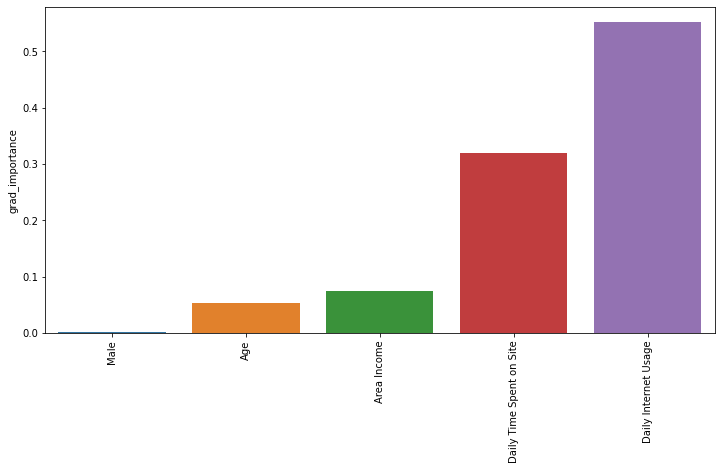

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

Modelin genel performansi oldukca yuksek (0.99)

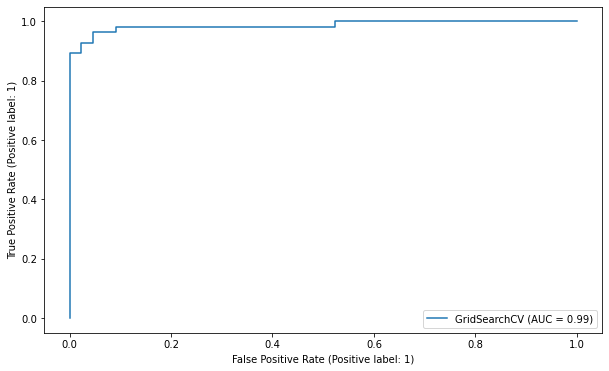

In [55]:
plot_roc_curve(grid, X_test, y_test);

# XG Boosting Modelling and Model Performance

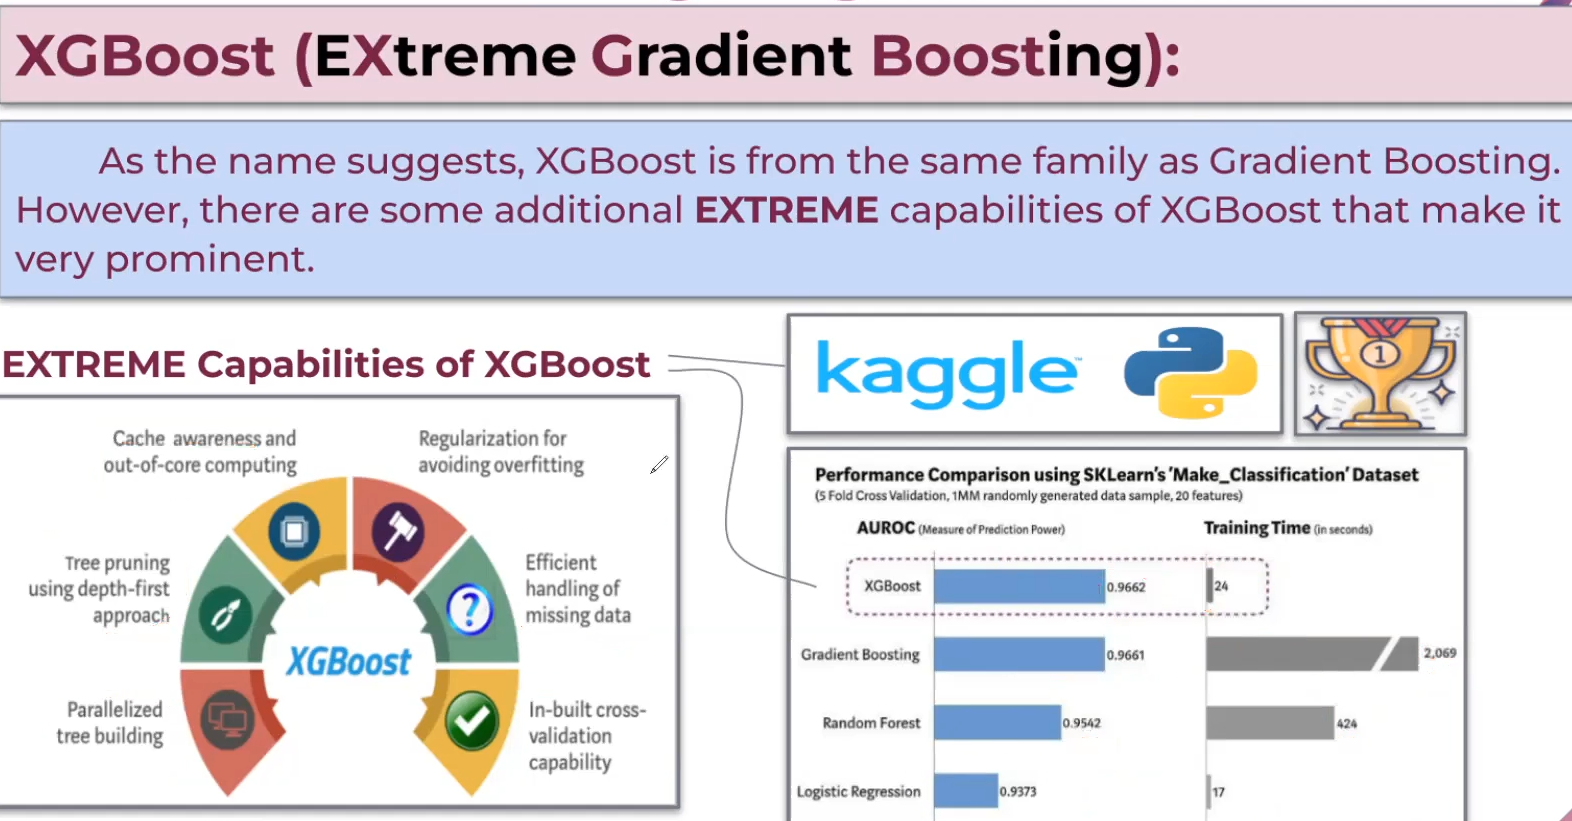

Linear Regression ile Tree based modellerin en guclu yonlerini birlestirerek olusturulmus guclu bir modeldir.

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

__PARAMETERS__

max_depth=3, learning_rate=0.1, n_estimator=100  parametreleri Gradient Boosting ile ayni ve burada da onemli parametreler.

OBJECTIVE -----> (Default='binary:logistic') Arka planda Logostoc Regression' i kullanir. ! Gredient Boost modelde bu parametrenin adi __loss__ idi. !

BOOSTER -----> (Default='gbtree') Tree modellerle Gradient tabanli modelleri birlestirmeye yardim eden parametre. Asıl olay burada. Ridge ve Lasso'yu da ayarlayabiliyorum.

REG_ALPHA -----> (Default=0) Lasso degeridir (l1)

REG_LAMBDA -----> (Default=1) Ridge degeridir. (l2) Arka planda Ridge ve Lasso ile regularization islemi de yapabiliriz. 

!!!! Ridge ve Lasso degerleri Gradient Boosting' de yoktu. Bu modelde var. XGBoost model, Gradient Boosting modelin gelistirilmis halidir. !!!!

Datamizda overfitting oldugu durumlarda lasso degeri ile oynayip modele cok sert mudahalelerde bulunabiliriz veya Ridge degeri ile oynayabiliriz.

SCALE_POS_WEIGTH -----> (Default=1). Onceki modellerde dengesiz veri setleri icin 'balanced' islemi vardi. Burda onun yerine bu parametre var. (Gradient Boosting' de bu ozellik yok)

Diyelim ki datada 10 tane bir sinifa ait, 100 tane diger sinifa ait veri var. 100/10=10 sonucuna gore __scale_pos_weight=10__ diyebiriz. Eger skorlar cok iyi cikmazsa 7, 8, 9, 11, 12, 13 gibi degerler de verilip skorlar gozlenebilir.

MIN_CHILD_RATE -----> (Default=1). Overfitting durumu varsa kullanilabilir; Lasso gibi davranir. 1 den daha buyuk degerler de verilebilir. Feature importance da bu parametreye yuksek degerler verilirse bazi feature' larin cok onemsizlestigi veya tamamen sifirlandigi gozlemlenebilir. Bu deger ile oynayarak da overfitting ile mucadele edilebilir. (Biz ornek olarak 100 degerine kadar degerler verdik)

SUBSAMPLE -----> (Default=1). Her agacta gozlemin ne kadarini kullansin? 0.5 ile 0.8 degerleri de GridSearch' de denenmeli. 

COL_SAMPLE_BYTREE -----> (Default=1). max_feature yerine bu parametre var. 0 ile 1 arasinda deger alir. Feature' larin yuzde kacini kullanmasini istedigimizi soyleriz. Bu feature'lari rastgele secer, aralarindan en iyisi ile isleme baslar. 

COL_SAMPLE_BYLEVEL -----> (dHer bolme isleminde kullanilan gozlem sayisini degistirmek istersek kullaniriz. Subsample ve col_sample_bytree kullaniliyorsa bu parametreye gerek yok. Kaynaklarda bu parametrenin degistirilmesi tavsiye edilmez. 

COL_SAMPLE_BYNODE -----> (Default=1) Bir agacta en son kalacak max leafe sayisi kac olsun? Default degereinde hepsi demis. Bunun yerine max_depth  ile oynamak daha mantikli. 

GAMMA -----> (Default=0) 0 ile sonsuz arasinda bir deger alir. Hangi datada hangi degeri alacagini bilemiyoruz. Bazi datalarinda 1 degeri, bazi datalarda 1 milysr degeri overfitting' i engeller. Kaggle yarismalarinda yarismacilar tarafindan cok kullanilir. Diyelim ki overfitting sorunu var, once __min_child_rate__ i kullandik fakat bir sonuc alamadik gamma' ya cok cok buyuk  degerler de dahil olmak uzere degerler verip overfitting ile mucadele etmesini saglayabiliriz. 

Bu modelin cok fazla parametresi oldugu icin overfitting durumlarinda GridSearch isleminden once max_depth, min_child_rate, gamma parametreleri kullanilarak manuel olarak overfitting ile mucadele etmeye calisip sonra GridSearch' e gitmek mantikli olur. 

Verbosity -----> Model arkada calisirken rapor yazsin mi yazmasin mi? (Onemli bir parametre degil.)

-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [58]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[454   2]
 [  7 437]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



Tek seferlik skorlarda overfitting durumu gorunmuyor. Cross Validate sonrasi da skorlar tutarli. 

__Cross Validate__

In [59]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.957778
test_precision    0.968757
test_recall       0.945909
test_f1           0.956573
test_roc_auc      0.988441
dtype: float64

## Gridsearch

In [60]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [61]:
xgb_model = XGBClassifier(random_state=42)

In [62]:
#from sklearn.metrics import make_scorer 

Eger istersek make scorer ile de istedigimiz label' in istedigimiz metrigini make_scorer icine tanimlayip GridSearch islemi yaptirabiliriz. 

In [63]:
#xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = make_scorer(precision_score,  average=None, pos_label=1), verbose=2, n_jobs = -1).fit(X_train, y_train)

In [64]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [65]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [66]:
xgb_grid.best_score_    # Cross Validate skoru. Asagidaki f1 skoru ile (%94) birbirine daha yakin. Overfitting durumu yok. 

0.9682125077654098

In [67]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Feature importances

In [68]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

xgb_importance
Male                            0.020181
Age                             0.113258
Area Income                     0.127919
Daily Time Spent on Site        0.356330
Daily Internet Usage            0.382312

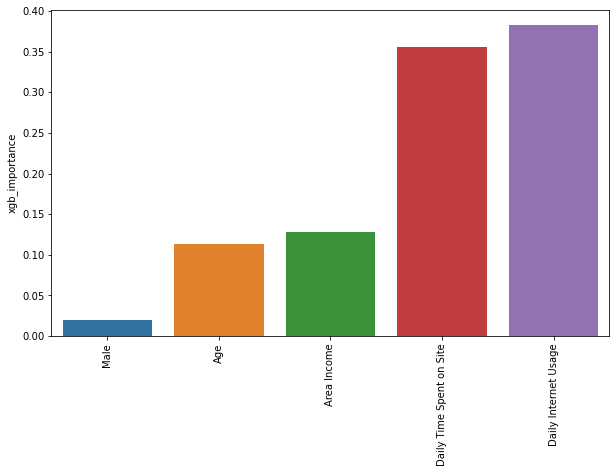

In [69]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

Yukaridaki butun feature importance sonuclarini asagida kiyaslarsak en dogru sonucu veren modelin XGBoost oldugunu gorebiliriz. Diger modellerin feature importance' larinin cok guvenilir olmadigi goruluyor. XGBoost tum feature'lara agirlik vermis, digerleri bazi feature' lara cok fazla agirlik verirken bazilarina hic vermemisler. 

Kaynaklarda feature importance bakimindan en guvenilir modelin Random  Forest oldugu soylenir, ikinci sirada XGBoost gelir. Tree based modeller icin Random Forest, boosting modeller icin XGBoost" un feature importance' lari kullanilabilir. 

In [70]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

ada_importance  grad_importance  xgb_importance
Male                                0.00         0.002008        0.020181
Area Income                         0.21         0.074586        0.127919
Age                                 0.22         0.053003        0.113258
Daily Time Spent on Site            0.28         0.319058        0.356330
Daily Internet Usage                0.29         0.551346        0.382312

## Evaluating ROC Curves and AUC

Modelin genel performansi oldukca yuksek. 

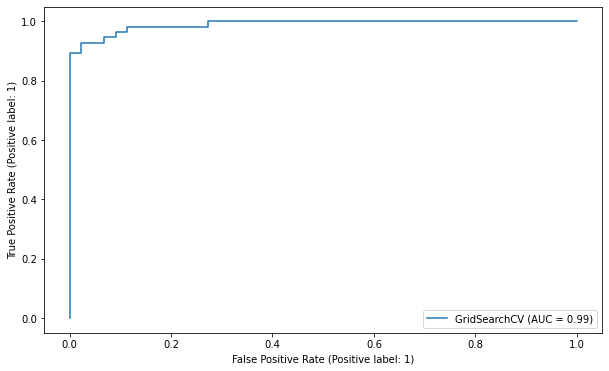

In [71]:
plot_roc_curve(xgb_grid, X_test, y_test);

# Random Forest

Default degerler ile Random Forest skorlarini alalim :

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



# Decision Tree

Default degerler ile Decision Tree skorlarini alalim : (Default deger kullandigimiz icin overfitting baslangici var gibi gorunuyor.)

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Logistic Regression

Default degerler ile Logistic Regression skorlarini alalim :

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[451   5]
 [ 22 422]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       456
           1       0.99      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## KNN

Default degerler ile KNN skorlarini alalim :

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[454   2]
 [ 24 420]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       1.00      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## SVM

Default degerler ile SVM skorlarini alalim :

In [81]:
from sklearn.svm import SVC

In [82]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[450   6]
 [ 17 427]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## Comparing Models

Karsilastirma icin genel formul : Model isimleri, F1, Recall, Roc_Auc skorlari (Yukarida bunlari degiskenlere atamistik) bir DataFrame icinde verilmis. 

Ikinci def kismi sayilarinnsagda gorunmesi icin.

plt.subplot(311) : 3--> Satir sayisi; 1---> Sutun sayisi; 1----> Ilk tablo

Bunun altina da compare' daki skorlari F1 skora gore, 2. tabloda Recall' a gore, 3. tabloda ise Roc_Auc'a gore azalan oranda sirala dedik. 

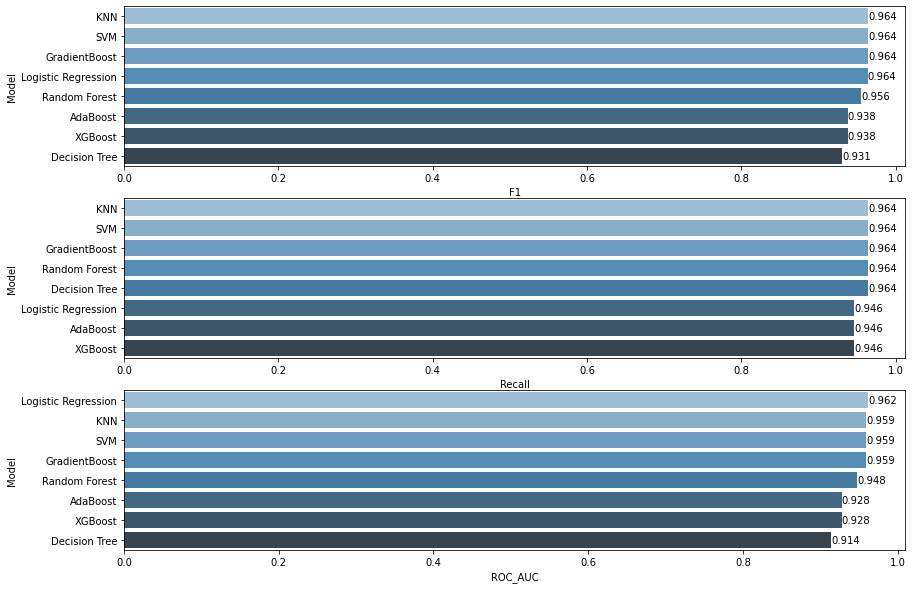

In [83]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

1. satir F1 skoru, 2. satir Recall satiri, 3. satir ise Roc_Auc skorudur.

Ilk satirda F1 skorlara gore sonuclara baktigimizda, KNN' nin en yuksek skoru verdigini goruyoruz. 

Ikinci satirda Recall skorlari arasinda da en yuksek  skorun KNN' de oldugunu goruyoruz. (F1 ve Recall skorlari yuksek ise Precision skorlari da yuksektir diyerek ayrica ona bakmadik.)

En yuksek KNN gibi dursa da modellerin skorlari genel olarak birbirine cok yakin. Bu yuzden modelin guvenilirligini olcen ROC_AUC skorlarina bakiyoruz. Burada da Logistic Regression one cikmis. Burada KNN veya Logistic Regression tercih edilmeli fakat KNN modelin maliyeti cok yuksek oldugu icin Logistic Regression secmek daha mantikli olacaktir. Cunku en hizli calisan algoritmadir. Skorlar yakin oldugu icin calisma maliyetlerini kiyasladik.

Feature importance gibi aciklamalar KNN uzerinden yapilamaz. Bu yuzden de tercih etmemek mantikli olur. Logistic Regression' da katsayilara gore hangi feature' in daha onemli oldugunu soyleyebliriz. Aciklamasi cok daha kolaydir. KNN modelin neye gore bir secim yaptigini aciklamak ise zordur. 

XGBoost gibi modelller cok guclu modeller olmasina ragmen, bazen burda oldugu gibi diger modeller on plana cikabilir. Bu yuzden tum modeller mutlaka denenmelidir.